# Project 1 Revisited

- Solution by: James Irving
- Updated: 11/22/21



# Project 1 - Part 5 <a name='part-5'></a>

- [Assignment Link](https://login.codingdojo.com/m/204/7153/54164)

### Preprocessing

In [51]:
## Typical Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Modeling & preprocessing import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer

In [52]:
## Load dataset from published web view link
import pandas as pd

fpath ="https://docs.google.com/spreadsheets/d/e/2PACX-1vS6Sn9LaMSc_E1EHQpuRK6BTpKp6h27obTP_dTpAVu_xtoqsge30jBGh9vYlO4DYe-utRKMgMqYChU_/pub?output=csv"
df = pd.read_csv(fpath)
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat             0.02   
1           DRC01         5.92          Regular             0.02   
2           FDN15        17.50          Low Fat             0.02   
3           FDX07        19.20          Regular             0.00   
4           NCD19         8.93          Low Fat             0.00   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy    249.81            OUT049   
1            Soft Drinks     48.27            OUT018   
2                   Meat    141.62            OUT049   
3  Fruits and Vegetables    182.09            OUT010   
4              Household     53.86            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1           3,735.14  
1  Supermarket Type2             443.42  
2  Supermarket Type1           2,097.27  
3      Grocery Store             732.38  
4  Supermarket Type1             994.71

In [53]:
## replace inconsistent categories
fat_content_map = {'LF':'Low Fat',
                   'reg':'Regular',
                   'low fat':'Low Fat'}

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)

## Verify 
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [54]:
## Define X and y
target = 'Item_Outlet_Sales'

X = df.drop(columns=target).copy()
y = df[target].copy()
X

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15         9.30          Low Fat             0.02   
1              DRC01         5.92          Regular             0.02   
2              FDN15        17.50          Low Fat             0.02   
3              FDX07        19.20          Regular             0.00   
4              NCD19         8.93          Low Fat             0.00   
...              ...          ...              ...              ...   
8518           FDF22         6.87          Low Fat             0.06   
8519           FDS36         8.38          Regular             0.05   
8520           NCJ29        10.60          Low Fat             0.04   
8521           FDN46         7.21          Regular             0.15   
8522           DRG01        14.80          Low Fat             0.04   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy    249.81            OUT049   
1               Soft Drinks     48.27            OUT018   
2                      Meat    141.62            OUT049   
3     Fruits and Vegetables    182.09            OUT010   
4                 Household     53.86            OUT013   
...                     ...       ...               ...   
8518            Snack Foods    214.52            OUT013   
8519           Baking Goods    108.16            OUT045   
8520     Health and Hygiene     85.12            OUT035   
8521            Snack Foods    103.13            OUT018   
8522            Soft Drinks     75.47            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type2  
2     Supermarket Type1  
3         Grocery Store  
4     Supermarket Type1  
...                 ...  
8518  Supermarket Type1  
8519  Supermarket Type1  
8520  Supermarket Type1  
8521  Supermarket Type2  
8522  Supermarket Type1  

[8523 rows x 11 columns]

In [55]:
## Drop unwanted/inappropriate columns 
bad_cols = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year']
X = X.drop(columns=bad_cols)
X

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0            9.30          Low Fat             0.02                  Dairy   
1            5.92          Regular             0.02            Soft Drinks   
2           17.50          Low Fat             0.02                   Meat   
3           19.20          Regular             0.00  Fruits and Vegetables   
4            8.93          Low Fat             0.00              Household   
...           ...              ...              ...                    ...   
8518         6.87          Low Fat             0.06            Snack Foods   
8519         8.38          Regular             0.05           Baking Goods   
8520        10.60          Low Fat             0.04     Health and Hygiene   
8521         7.21          Regular             0.15            Snack Foods   
8522        14.80          Low Fat             0.04            Soft Drinks   

      Item_MRP Outlet_Size Outlet_Location_Type        Outlet_Type  
0       249.81      Medium               Tier 1  Supermarket Type1  
1        48.27      Medium               Tier 3  Supermarket Type2  
2       141.62      Medium               Tier 1  Supermarket Type1  
3       182.09         NaN               Tier 3      Grocery Store  
4        53.86        High               Tier 3  Supermarket Type1  
...        ...         ...                  ...                ...  
8518    214.52        High               Tier 3  Supermarket Type1  
8519    108.16         NaN               Tier 2  Supermarket Type1  
8520     85.12       Small               Tier 2  Supermarket Type1  
8521    103.13      Medium               Tier 3  Supermarket Type2  
8522     75.47       Small               Tier 1  Supermarket Type1  

[8523 rows x 8 columns]

In [56]:
## Perform a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

#### Making a Preprocessing Pipeline

In [57]:
## Create categorical data selector & test
cat_selector = make_column_selector(dtype_include='object')
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [58]:
# create pipeline for handling categorical data
impute_most_freq = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)

cat_pipe = make_pipeline(impute_most_freq,encoder)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [59]:
## test cat_pipe (optional)
cat_pipe.fit_transform(X_train[ cat_selector(X_train)])

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [60]:
## Create numeric data selector & test
num_selector = make_column_selector(dtype_include='number')
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

In [61]:
# create pipeline for handling categorical data
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [62]:
## test num_pipe (optional)
num_pipe.fit_transform(X_train[ num_selector(X_train)])

array([[ 0.81724868, -0.71277507,  1.82810922],
       [ 0.5563395 , -1.29105225,  0.60336888],
       [-0.13151196,  1.81331864,  0.24454056],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674],
       [ 1.76600931, -0.2277552 , -0.38377708],
       [ 0.81724868, -0.95867683, -0.73836105]])

In [63]:

## Combine into 1 column transformer
preprocessor = make_column_transformer( (cat_pipe,cat_selector),
                                       (num_pipe,num_selector))
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16652da60>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1682f33a0>)])

In [64]:
## Test Col Transformer (optional)
preprocessor.fit_transform(X_train)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


array([[ 1.        ,  0.        ,  0.        , ...,  0.81724868,
        -0.71277507,  1.82810922],
       [ 0.        ,  1.        ,  0.        , ...,  0.5563395 ,
        -1.29105225,  0.60336888],
       [ 0.        ,  1.        ,  0.        , ..., -0.13151196,
         1.81331864,  0.24454056],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.11373638,
        -0.92052713,  1.52302674],
       [ 1.        ,  0.        ,  0.        , ...,  1.76600931,
        -0.2277552 , -0.38377708],
       [ 1.        ,  0.        ,  0.        , ...,  0.81724868,
        -0.95867683, -0.73836105]])

# Project 1 - Final <a name='final'></a>

- [Assignment Link](https://login.codingdojo.com/m/213/7197/54165)

## Instructions

### Model 1 -  linear regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False,
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x16652da60>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x1682f33a0>)])

#### Using a combined preprocessing + modeling pipeline

In [67]:
## Make & Fit the modeling pipeline
pipe = make_pipeline(preprocessor, LinearRegression())
pipe.fit(X_train, y_train)

## Quick peek at the R^2 value for test data
pipe.score(X_test,y_test)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


0.5656219081346785

In [68]:
# Get predictions to use to evaluate model
y_hat_train = pipe.predict(X_train)
y_hat_test = pipe.predict(X_test)

In [69]:
def evaluate_model(y_true, y_pred, split='training'):
  """ prints RMSE, and R2 metrics, include which data split was evaluated
  
  Args:
    y_true: y-train or y-test
    y_pred: result of model.predict(X)
    split: which data split is being evaluate ['training','test']
  """
  
  r2 = r2_score(y_true,y_pred)
  rmse = mean_squared_error(y_true,y_pred,squared=False)

  print(f'Results for {split} data:')
  print(f"  - R^2 = {round(r2,3)}")
  print(f"  - RMSE = {round(rmse,3)}")
  print()

In [70]:
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='test')

Results for training data:
  - R^2 = 0.56
  - RMSE = 1141.432

Results for test data:
  - R^2 = 0.566
  - RMSE = 1094.733



>- The Linear Regression was able to explain ~56% of the variation in our target (R^2 train=056, R^2 test=0.566)
- The RMSE scores were very similar for the training vs test set.
- This model is not a great model, but it is a consistent one. 

### Model 2 - Decision Tree Regressor

In [71]:
from sklearn.tree import DecisionTreeRegressor

In [72]:
## Make and fit model
tree_pipe = make_pipeline(preprocessor,DecisionTreeRegressor())
tree_pipe.fit(X_train, y_train)

## Get predictions for training and test data
y_hat_train = tree_pipe.predict(X_train)
y_hat_test = tree_pipe.predict(X_test)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [73]:
## Evaluate model's performance
evaluate_model(y_train, y_hat_train,split='training')
evaluate_model(y_test, y_hat_test,split='test')

Results for training data:
  - R^2 = 1.0
  - RMSE = 0.0

Results for test data:
  - R^2 = 0.112
  - RMSE = 1564.848



>- The DecisionTreeRegressor was extremely overfit and is not recommended for use/deployment. 
  - The training scores were a perfect R^2 (1.0), and there was no error (RMSE=0.0)
  - Whereas the test data had an R^2 of 0.12 and an RMSE of 1159

### Evaluation

- Overall the best model is by far the simple LinearRegression. It performed equally well on the training and test data. While it's R-Square of 0.56 is not fantastic, it is still far better than 0.11.

- Additionally, LinearRegression coefficients can tell us more about the relationship between the features and our target than a decision tree's feature importances. 

# **Project 1 - Revisited: Importances & Coefficients** [Stack 5]

### Remaking X_train and X_test post-processing

In [74]:
## Create categorical data selector & test
cat_selector = make_column_selector(dtype_include='object')

# create pipeline for handling categorical data
impute_most_freq = SimpleImputer(strategy='most_frequent')
encoder = OneHotEncoder(drop='if_binary',sparse=False)

cat_pipe = make_pipeline(impute_most_freq,encoder)

## Create numeric data selector & test
num_selector = make_column_selector(dtype_include='number')

# create pipeline for handling categorical data
impute_mean = SimpleImputer(strategy='mean')
scaler = StandardScaler()
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe


## Combine into 1 column transformer
preprocessor = make_column_transformer( (cat_pipe,cat_selector),
                                       (num_pipe,num_selector),
                                       verbose_feature_names_out=False)
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [75]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train), 
                          columns = feature_names, index = X_train.index)


X_test_df = pd.DataFrame(preprocessor.transform(X_test), 
                          columns = feature_names, index = X_test.index)
display(X_train_df.head(3),X_test_df.head(3))

Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
4776                      0.00                    0.00              0.00   
7510                      1.00                    0.00              0.00   
5828                      1.00                    0.00              0.00   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
4776                 0.00              0.00             0.00   
7510                 0.00              0.00             0.00   
5828                 0.00              0.00             0.00   

      Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
4776                    0.00                             0.00   
7510                    0.00                             0.00   
5828                    0.00                             0.00   

      Item_Type_Hard Drinks  Item_Type_Health and Hygiene  ...  \
4776                   0.00                          0.00  ...   
7510                   0.00                          0.00  ...   
5828                   0.00                          0.00  ...   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
4776                         0.00                         0.00   
7510                         0.00                         0.00   
5828                         1.00                         0.00   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
4776                         1.00                       0.00   
7510                         1.00                       0.00   
5828                         0.00                       0.00   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
4776                           0.00                           1.00   
7510                           0.00                           1.00   
5828                           1.00                           0.00   

      Outlet_Type_Supermarket Type3  Item_Weight  Item_Visibility  Item_MRP  
4776                           0.00         0.82            -0.71      1.83  
7510                           0.00         0.56            -1.29      0.60  
5828                           0.00        -0.13             1.81      0.24  

[3 rows x 30 columns]

Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
7503                      0.00                    0.00              0.00   
2957                      0.00                    0.00              0.00   
7031                      1.00                    0.00              0.00   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
7503                 0.00              0.00             0.00   
2957                 0.00              0.00             0.00   
7031                 0.00              1.00             0.00   

      Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
7503                    1.00                             0.00   
2957                    0.00                             0.00   
7031                    0.00                             0.00   

      Item_Type_Hard Drinks  Item_Type_Health and Hygiene  ...  \
7503                   0.00                          0.00  ...   
2957                   0.00                          1.00  ...   
7031                   0.00                          0.00  ...   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
7503                         0.00                         0.00   
2957                         1.00                         0.00   
7031                         1.00                         0.00   

      Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
7503                         1.00                       0.00   
2957                         0.00                       0.00   
7031                         0.00                       0.00   

      Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
7503                           1.00                           0.00   
2957                           1.00                           0.00   
7031                           1.00                           0.00   

      Outlet_Type_Supermarket Type3  Item_Weight  Item_Visibility  Item_MRP  
7503                           0.00         0.33            -0.78     -1.00  
2957                           0.00        -1.18             0.10     -1.59  
7031                           0.00         0.38            -0.48     -1.60  

[3 rows x 30 columns]

In [76]:
from sklearn import metrics
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.3f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.3f}\tRMSE= {rmse_test:.2f}")
    

### LinearRegression

In [77]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.560	RMSE= 1141.06
Test Data:	R^2= 0.565	RMSE= 1095.97


#### Extract and visualize the coefficients that your model determined.

In [78]:
coeffs = pd.Series(lin_reg.coef_, index=feature_names,
                        name='Coefficients')
coeffs.loc['Intercept'] = lin_reg.intercept_
coeffs.head()

Item_Fat_Content_Regular                      56.83
Item_Type_Baking Goods     2,773,387,739,251,856.00
Item_Type_Breads           2,773,387,739,251,812.00
Item_Type_Breakfast        2,773,387,739,251,952.00
Item_Type_Canned           2,773,387,739,251,842.00
Name: Coefficients, dtype: float64

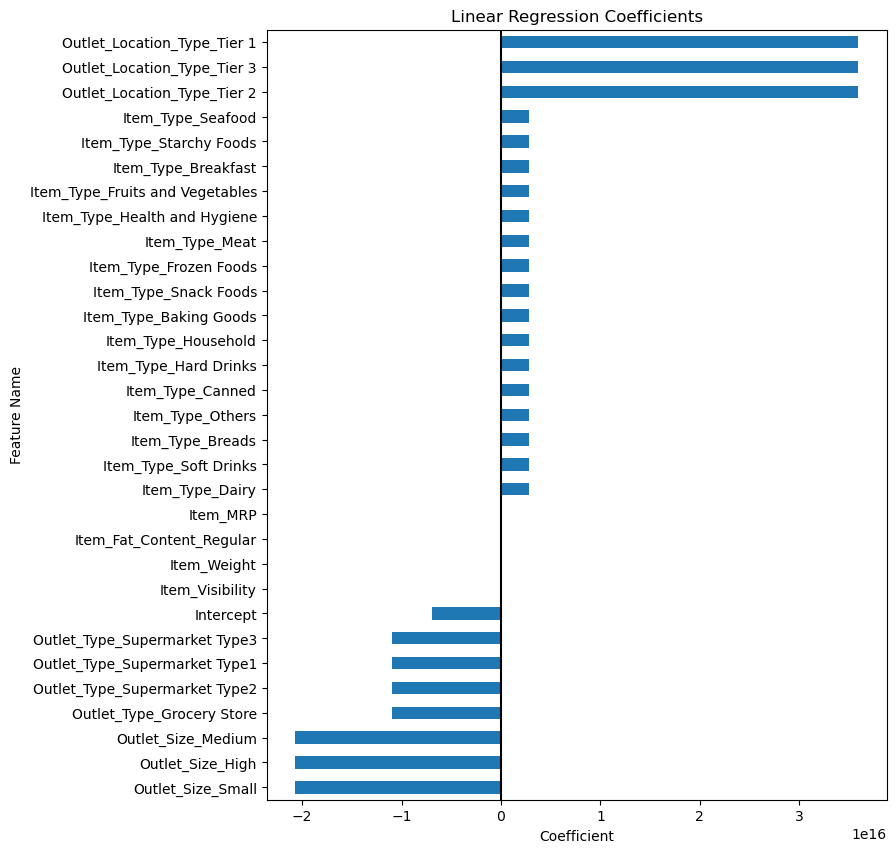

In [79]:
ax = coeffs.sort_values().plot(kind='barh',figsize=(8,10))
ax.axvline(0,color='k');
ax.set(title='Linear Regression Coefficients', ylabel='Feature Name', 
       xlabel='Coefficient')
fig = ax.get_figure();

In [80]:
pd.set_option('display.float_format',lambda x: f"{x:,.2f}")

In [81]:
coeffs.sort_values(ascending=False)

Outlet_Location_Type_Tier 1        35,953,595,119,773,248.00
Outlet_Location_Type_Tier 3        35,953,595,119,773,244.00
Outlet_Location_Type_Tier 2        35,953,595,119,773,204.00
Item_Type_Seafood                   2,773,387,739,252,171.50
Item_Type_Starchy Foods             2,773,387,739,251,964.00
Item_Type_Breakfast                 2,773,387,739,251,952.00
Item_Type_Fruits and Vegetables     2,773,387,739,251,874.50
Item_Type_Health and Hygiene        2,773,387,739,251,861.50
Item_Type_Meat                      2,773,387,739,251,861.00
Item_Type_Frozen Foods              2,773,387,739,251,857.50
Item_Type_Snack Foods               2,773,387,739,251,857.00
Item_Type_Baking Goods              2,773,387,739,251,856.00
Item_Type_Household                 2,773,387,739,251,853.00
Item_Type_Hard Drinks               2,773,387,739,251,851.50
Item_Type_Canned                    2,773,387,739,251,842.00
Item_Type_Others                    2,773,387,739,251,814.00
Item_Type_Breads        

#### Select the top 3 most impactful features and interpret their coefficients in plain english.



- Outlet_Location_Type_Tier 1:
    - Having Location_Type_Tier 1 increased outlet sales by 35,953,595,119,773,248.00 Rupees.
- Outlet_Location_Type_Tier 3        
    - Having Location_Type_Tier 3 increased outlet sales by 35,953,595,119,773,244.00 Rupees.
- Outlet_Location_Type_Tier 2       
    - Having Location_Type_Tier 2 increased outlet sales by  35,953,595,119,773,204.00 Rupees.

- Save your figure as a .png file inside of your repository (you will need this for the final piece of this assignment - Update Your README).

In [82]:
fig.savefig('images/solution_core_1_coeffs.png',transparent=False, bbox_inches='tight')

![png](images/solution_core_1_coeffs.png)

### ~~DecisionTreeRegressor~~ RandomForestRegressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:

tree_reg = RandomForestRegressor()#DecisionTreeRegressor()
tree_reg.fit(X_train_df, y_train)
evaluate_regression(tree_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R^2= 0.937	RMSE= 431.15
Test Data:	R^2= 0.540	RMSE= 1125.95


#### Extract and visualize the feature importances that your model determined.

In [85]:
importances = pd.Series(tree_reg.feature_importances_, index=feature_names,
                        name='Feature Importances')
importances.head()

Item_Fat_Content_Regular   0.01
Item_Type_Baking Goods     0.00
Item_Type_Breads           0.00
Item_Type_Breakfast        0.00
Item_Type_Canned           0.00
Name: Feature Importances, dtype: float64

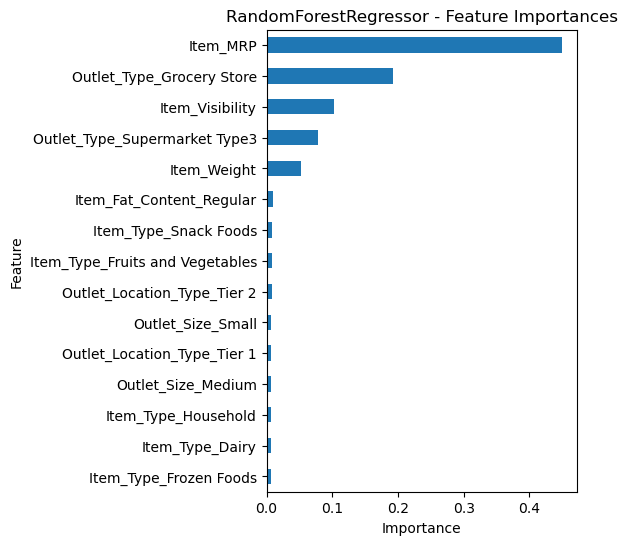

In [86]:
ax = importances.sort_values().tail(15).plot(kind='barh',figsize=(4,6))
ax.set(title='RandomForestRegressor - Feature Importances', ylabel='Feature', 
      xlabel='Importance');
fig = ax.get_figure()

#### Identify the top 5 most important features.

- The top 5 most important features were:
    - Item_MRP
    - Outlet_Type_Grocery_Store
    - Item_Visibility
    - Outlet_Type_Supermarket Type3
    - Item_Weight

Save your figure as a .png file inside of your repository  (you will need this for the final piece of this assignment - Update Your README).

In [87]:
fig.savefig('images/solution_core_1_importances.png',transparent=False, bbox_inches='tight')

![png](images/solution_core_1_importances.png)

# (Core #2) Project 1 Revisited: Global Explanations

### Global Model Explanations

In [88]:
import shap
shap.initjs()

In [89]:
X_train_df.shape, X_test_df.shape

((6392, 30), (2131, 30))

In [90]:
X_shap = shap.sample(X_train_df, nsamples=400,random_state=321)
X_shap

Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
3888                      1.00                    0.00              0.00   
2497                      1.00                    0.00              0.00   
7723                      0.00                    0.00              0.00   
8117                      0.00                    0.00              0.00   
7475                      0.00                    0.00              0.00   
...                        ...                     ...               ...   
292                       0.00                    0.00              0.00   
3035                      1.00                    0.00              0.00   
6832                      0.00                    1.00              0.00   
8455                      0.00                    0.00              0.00   
7795                      0.00                    0.00              0.00   

      Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
3888                 0.00              0.00             0.00   
2497                 0.00              0.00             0.00   
7723                 0.00              0.00             0.00   
8117                 0.00              0.00             0.00   
7475                 0.00              0.00             0.00   
...                   ...               ...              ...   
292                  0.00              0.00             0.00   
3035                 0.00              0.00             0.00   
6832                 0.00              0.00             0.00   
8455                 0.00              1.00             0.00   
7795                 0.00              0.00             0.00   

      Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
3888                    1.00                             0.00   
2497                    0.00                             1.00   
7723                    0.00                             1.00   
8117                    0.00                             1.00   
7475                    0.00                             0.00   
...                      ...                              ...   
292                     0.00                             1.00   
3035                    0.00                             0.00   
6832                    0.00                             0.00   
8455                    0.00                             0.00   
7795                    0.00                             0.00   

      Item_Type_Hard Drinks  Item_Type_Health and Hygiene  ...  \
3888                   0.00                          0.00  ...   
2497                   0.00                          0.00  ...   
7723                   0.00                          0.00  ...   
8117                   0.00                          0.00  ...   
7475                   0.00                          1.00  ...   
...                     ...                           ...  ...   
292                    0.00                          0.00  ...   
3035                   0.00                          0.00  ...   
6832                   0.00                          0.00  ...   
8455                   0.00                          0.00  ...   
7795                   0.00                          1.00  ...   

      Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
3888                         0.00                         1.00   
2497                         1.00                         0.00   
7723                         0.00                         1.00   
8117                         0.00                         1.00   
7475                         0.00                         1.00   
...                           ...                          ...   
292                          0.00                         1.00   
3035                         0.00                         0.00   
6832                         0.00                         0.00   
8455                         0.00                         1.00   
7795                    

In [91]:
y_shap = y_train.loc[X_shap.index]
y_shap

3888     759.01
2497     663.14
7723   2,766.40
8117   1,225.07
7475   1,685.81
         ...   
292    1,379.54
3035   2,956.15
6832   1,259.69
8455   4,206.52
7795     605.88
Name: Item_Outlet_Sales, Length: 400, dtype: float64

#### Resetting Index to Simplify Slicing 

In [92]:
orig_index = X_shap.index
orig_index

Int64Index([3888, 2497, 7723, 8117, 7475,  290, 5341, 6755, 7903,  662,
            ...
            5585, 6711, 1475, 5258,  312,  292, 3035, 6832, 8455, 7795],
           dtype='int64', length=400)

In [93]:
X_shap = X_shap.reset_index(drop=True)
y_shap = y_shap.reset_index(drop=True)
X_shap

Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
0                        1.00                    0.00              0.00   
1                        1.00                    0.00              0.00   
2                        0.00                    0.00              0.00   
3                        0.00                    0.00              0.00   
4                        0.00                    0.00              0.00   
..                        ...                     ...               ...   
395                      0.00                    0.00              0.00   
396                      1.00                    0.00              0.00   
397                      0.00                    1.00              0.00   
398                      0.00                    0.00              0.00   
399                      0.00                    0.00              0.00   

     Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
0                   0.00              0.00             0.00   
1                   0.00              0.00             0.00   
2                   0.00              0.00             0.00   
3                   0.00              0.00             0.00   
4                   0.00              0.00             0.00   
..                   ...               ...              ...   
395                 0.00              0.00             0.00   
396                 0.00              0.00             0.00   
397                 0.00              0.00             0.00   
398                 0.00              1.00             0.00   
399                 0.00              0.00             0.00   

     Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
0                      1.00                             0.00   
1                      0.00                             1.00   
2                      0.00                             1.00   
3                      0.00                             1.00   
4                      0.00                             0.00   
..                      ...                              ...   
395                    0.00                             1.00   
396                    0.00                             0.00   
397                    0.00                             0.00   
398                    0.00                             0.00   
399                    0.00                             0.00   

     Item_Type_Hard Drinks  Item_Type_Health and Hygiene  ...  \
0                     0.00                          0.00  ...   
1                     0.00                          0.00  ...   
2                     0.00                          0.00  ...   
3                     0.00                          0.00  ...   
4                     0.00                          1.00  ...   
..                     ...                           ...  ...   
395                   0.00                          0.00  ...   
396                   0.00                          0.00  ...   
397                   0.00                          0.00  ...   
398                   0.00                          0.00  ...   
399                   0.00                          1.00  ...   

     Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
0                           0.00                         1.00   
1                           1.00                         0.00   
2                           0.00                         1.00   
3                           0.00                         1.00   
4                           0.00                         1.00   
..                           ...                          ...   
395                         0.00                         1.00   
396                         0.00                         0.00   
397                         0.00                         0.00   
398                         0.00                         1.00   
399                         0.00                         0.00   

     Outlet_Loca

In [94]:
reset_index = X_shap.index
reset_index

RangeIndex(start=0, stop=400, step=1)

In [95]:
## saving a dictionary map of indices for later (if needed)
shap_index_map = dict(zip(reset_index, orig_index))
shap_index_map[100]

6069

### Creating shap explainer and calculating shap values

In [96]:
explainer = shap.Explainer(tree_reg)#, X_shap)
shap_values = explainer(X_shap,y_shap)

#### Shap Summary Plot - Bar

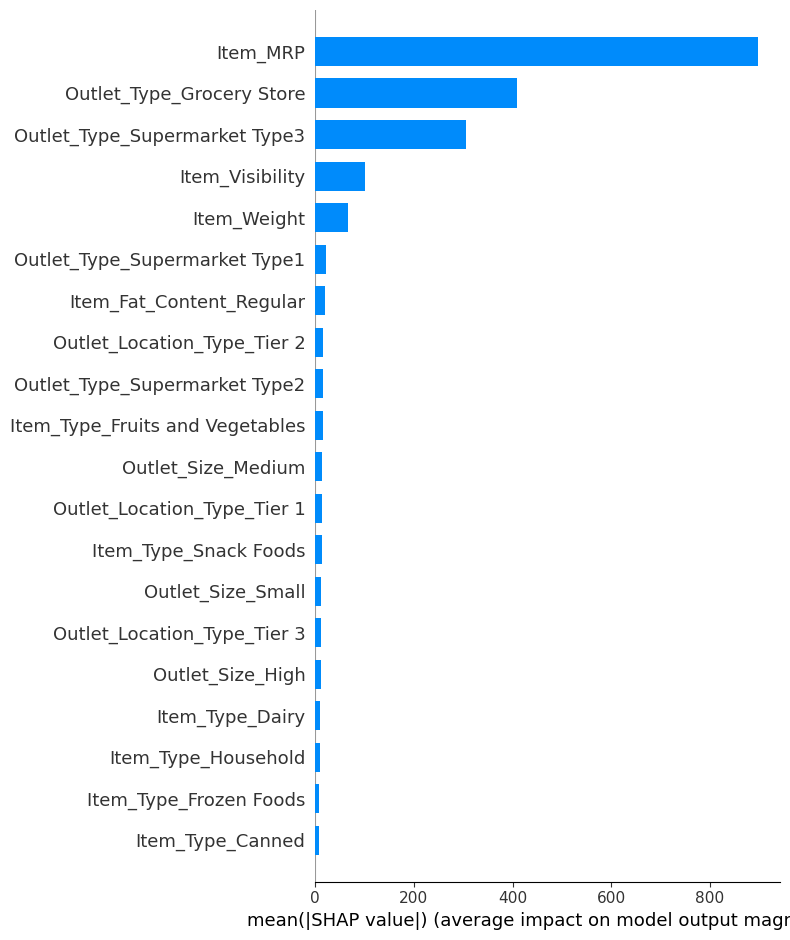

Text(0.5, 1.0, 'Summary Plot - Outlet Sales')

In [97]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, plot_type='bar')
ax.set_title('Summary Plot - Outlet Sales')

- Comparing the top 5 most important features according to SHAP vs. your RandomForest:
    - The top 5 most important features were the same according to Shap vs the RandomForest. 
    - However, the order was slightly different (Item_Visibility is 4th according to shap instead of 3rd).

- Save your figure as a .png file inside of your repository  (you will need this for the final piece of this assignment - Update Your README).

In [98]:
fig.savefig('images/solution_core_2_summary-bar.png',transparent=False, bbox_inches='tight')

![png](images/solution_core_2_summary-bar.png)

#### Shap Summary Plot - Dot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


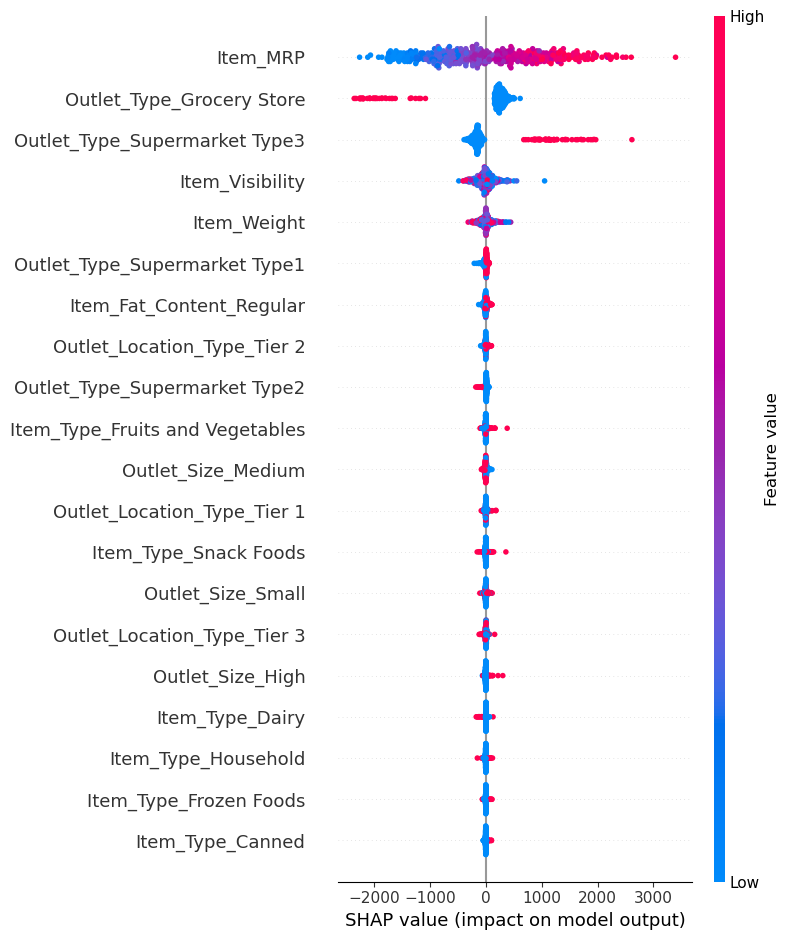

In [99]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values)
ax.set_title('Summary Plot - Dot');

- The top 3 most important features and their effects were the following:
    1. Item_MRP: The higher the MRP, the higher the predicted sales.
    2. Outlet_Type_Grocery Store: Being a grocery store dramatically reduces predicted sales.
    3. Outlet_Type_Supermarket Type3:  Being a supermarket type 3 dramatically increased the predicted sales.

In [100]:
fig.savefig('images/solution_core_2_summary-dot.png',transparent=False, bbox_inches='tight')

![png](images/solution_core_2_summary-dot.png)

# **(Core #3) Project 1 - Local Explanations**

<h2>Task</h2>
<ul><li>For this assignment, you will be revisiting your first project to predict supermarket sales. You will be applying everything you've learned this week to explain how your models made their predictions.</li></ul><h2>Part 3 - Local Explanations</h2>
<ul><li><strong>Select at least 2 example outlets based on the insights gained from your previous core assignments this week.&nbsp;</strong></li></ul><ul><li><strong>Explain why you selected the examples that you did.&nbsp;</strong><ul><li>If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).</li></ul></li></ul><ul><li><strong>For each example, produce :&nbsp;</strong><ul><li><strong>a Lime tabular explanation&nbsp;</strong><ul><li>Interpret what features most heavily influenced the predictions, according to LIME.</li><li>Save your figure as a .png file inside of your repository&nbsp;&nbsp;(you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the lime explanation.</li></ul></li><li><strong>an Individual Force Plot</strong><ul><li>Interpret what features most heavily&nbsp;influenced the predictions, according to SHAP.</li><li>Save your figure as a .png file inside of your repository&nbsp;&nbsp;(you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the individual force plot.</li></ul></li></ul></li></ul><p><br></p><h3>Update your README.<a href="http://localhost:8889/notebooks/ASSIGNMENTS/06_Core%203%20-%20Project%201%20(Explained!).ipynb#Part-3:-Update-your-README." class="anchor-link" target="_blank"></a></h3>
<ul><li>Add your explanation for why you selected the individual examples that you visualized.</li><li>For each example&nbsp;(need at least 2 examples)<ul><li>A Lime tabular explanation&nbsp;<ul><li>Your corresponding interpretation</li></ul></li><li>A sharp force plot&nbsp;<ul><li>Your corresponding interpretation.</li></ul></li></ul></li></ul><p></p>
<p>Submit the link to your project repository.</p><p></p>
        
        </div>

# SOLUTION

## 1) Decide which example rows to use.

Use the top features from SHAP/feature importance:
- First, create filters for each of the top outlet types.
    - Select 1 with OutletType ='Grocery Store'
    - Select 1 with OutletType = 'Supermarket Type3'
    
- Second, within each OutletType, select an example using values from:
    - ItemWeight or ItemVisibility [?]

### Example Grocery Store

In [101]:
filt_grocery_store = X_shap['Outlet_Type_Grocery Store'] == 1
filt_grocery_store.value_counts()

False    365
True      35
Name: Outlet_Type_Grocery Store, dtype: int64

- 35 grocery stores in X_shap. Let's compare their Item_Visibility distributions

In [102]:
X_shap.loc[filt_grocery_store, "Item_Visibility"]

21     0.62
34     0.62
40     1.00
42    -0.42
72    -0.88
74    -0.43
76    -1.29
89     1.93
104    3.13
122   -0.46
132   -1.29
156    0.04
157    0.76
174   -0.79
175   -0.79
192    0.55
199    0.57
209    0.52
213    0.31
228   -0.45
229   -1.29
250    3.25
260    0.17
261   -1.29
262   -0.62
269    2.44
285    1.53
291    2.38
297    0.71
312   -1.29
332   -0.20
359   -0.15
371    0.32
373    2.78
380    0.70
Name: Item_Visibility, dtype: float64

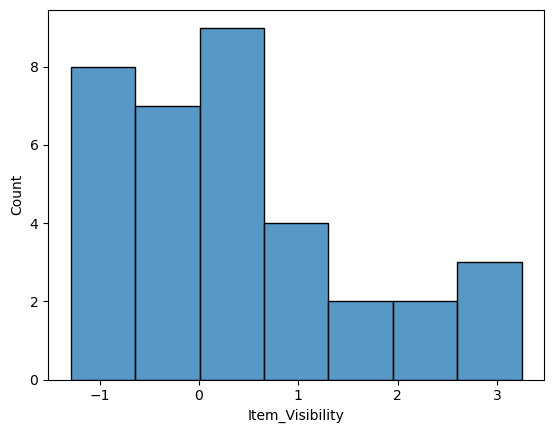

In [103]:
sns.histplot(X_shap.loc[filt_grocery_store,'Item_Visibility']);

- Let's call any visibility > 2 as high visibility.

In [104]:
filt_high_visibility = X_shap['Item_Visibility'] > 2
filt_high_visibility.value_counts()

False    386
True      14
Name: Item_Visibility, dtype: int64

In [105]:
X_shap.loc[ filt_grocery_store&filt_high_visibility]

Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
104                      1.00                    0.00              0.00   
250                      1.00                    0.00              0.00   
269                      0.00                    0.00              0.00   
291                      0.00                    0.00              0.00   
373                      0.00                    0.00              0.00   

     Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
104                 0.00              0.00             0.00   
250                 0.00              0.00             0.00   
269                 0.00              0.00             0.00   
291                 0.00              0.00             0.00   
373                 0.00              0.00             0.00   

     Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
104                    0.00                             0.00   
250                    1.00                             0.00   
269                    0.00                             0.00   
291                    0.00                             0.00   
373                    0.00                             0.00   

     Item_Type_Hard Drinks  Item_Type_Health and Hygiene  ...  \
104                   0.00                          0.00  ...   
250                   0.00                          0.00  ...   
269                   0.00                          1.00  ...   
291                   0.00                          1.00  ...   
373                   0.00                          0.00  ...   

     Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
104                         0.00                         0.00   
250                         1.00                         0.00   
269                         0.00                         0.00   
291                         0.00                         0.00   
373                         1.00                         0.00   

     Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
104                         1.00                       1.00   
250                         0.00                       1.00   
269                         1.00                       1.00   
291                         1.00                       1.00   
373                         0.00                       1.00   

     Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
104                           0.00                           0.00   
250                           0.00                           0.00   
269                           0.00                           0.00   
291                           0.00                           0.00   
373                           0.00                           0.00   

     Outlet_Type_Supermarket Type3  Item_Weight  Item_Visibility  Item_MRP  
104                           0.00         1.14             3.13      0.70  
250                           0.00         0.00             3.25      1.40  
269                           0.00        -0.76             2.44      0.27  
291                           0.00        -1.06             2.38     -1.22  
373                           0.00         0.00             2.78      1.38  

[5 rows x 30 columns]

- Selecting our final example from the preview above.

In [106]:
idx_example_A = 104
X_shap.loc[idx_example_A]

Item_Fat_Content_Regular          1.00
Item_Type_Baking Goods            0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Item_Type_Canned                  0.00
Item_Type_Dairy                   0.00
Item_Type_Frozen Foods            0.00
Item_Type_Fruits and Vegetables   0.00
Item_Type_Hard Drinks             0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Household               0.00
Item_Type_Meat                    0.00
Item_Type_Others                  0.00
Item_Type_Seafood                 0.00
Item_Type_Snack Foods             0.00
Item_Type_Soft Drinks             0.00
Item_Type_Starchy Foods           1.00
Outlet_Size_High                  0.00
Outlet_Size_Medium                1.00
Outlet_Size_Small                 0.00
Outlet_Location_Type_Tier 1       0.00
Outlet_Location_Type_Tier 2       0.00
Outlet_Location_Type_Tier 3       1.00
Outlet_Type_Grocery Store         1.00
Outlet_Type_Supermarket Type1     0.00
Outlet_Type_Supermarket T

### Example Supermarket Type3

In [107]:
filt_supermarket_type3 = X_shap['Outlet_Type_Supermarket Type3'] == 1
filt_supermarket_type3.value_counts()

False    350
True      50
Name: Outlet_Type_Supermarket Type3, dtype: int64

In [108]:
X_shap.loc[filt_supermarket_type3, "Item_Visibility"]

10    -1.02
11    -0.51
14     0.45
25    -0.61
28     0.09
36    -0.55
41     0.07
47    -0.00
53    -0.75
58     0.38
75    -0.23
82    -0.81
94    -1.29
105   -0.69
115    1.03
123   -0.28
124    0.06
152   -1.29
153   -0.04
159   -0.37
160   -1.04
169   -1.02
170    0.12
179   -0.82
184   -0.82
186    0.88
190    1.09
207   -0.79
215   -1.18
224    0.07
225   -0.15
244   -0.04
248   -0.74
256    1.10
257   -1.18
296   -0.79
303   -1.29
307   -1.02
310   -0.48
319   -0.52
326   -1.00
330   -0.72
347   -0.55
357    0.16
363    2.04
367    0.18
369   -0.41
372   -1.29
386   -1.29
389   -0.54
Name: Item_Visibility, dtype: float64

<Axes: xlabel='Item_Visibility', ylabel='Count'>

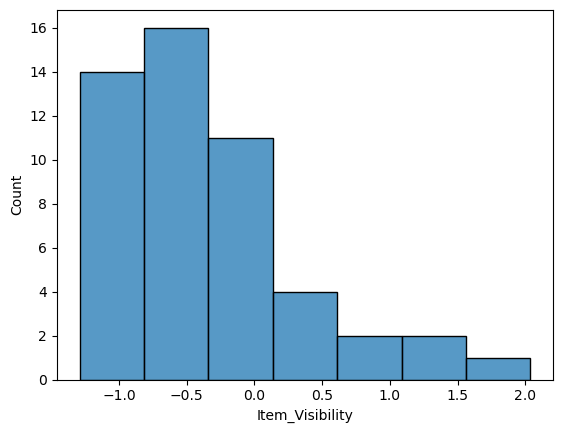

In [109]:
sns.histplot(X_shap.loc[filt_supermarket_type3, "Item_Visibility"])

In [110]:
X_shap.loc[filt_supermarket_type3&filt_high_visibility]

Item_Fat_Content_Regular  Item_Type_Baking Goods  Item_Type_Breads  \
363                      1.00                    0.00              0.00   

     Item_Type_Breakfast  Item_Type_Canned  Item_Type_Dairy  \
363                 0.00              0.00             0.00   

     Item_Type_Frozen Foods  Item_Type_Fruits and Vegetables  \
363                    0.00                             1.00   

     Item_Type_Hard Drinks  Item_Type_Health and Hygiene  ...  \
363                   0.00                          0.00  ...   

     Outlet_Location_Type_Tier 1  Outlet_Location_Type_Tier 2  \
363                         0.00                         0.00   

     Outlet_Location_Type_Tier 3  Outlet_Type_Grocery Store  \
363                         1.00                       0.00   

     Outlet_Type_Supermarket Type1  Outlet_Type_Supermarket Type2  \
363                           0.00                           0.00   

     Outlet_Type_Supermarket Type3  Item_Weight  Item_Visibility  Item_MRP  
363                           1.00         0.00             2.04     -0.01  

[1 rows x 30 columns]

- Selecting example B from the preview above (only row)

In [111]:
idx_example_B = 363

### Comparing Example A and B

In [112]:
print(f'Sales: {y_shap.loc[idx_example_A]}','\n')

print("Features:")
print(X_shap.loc[idx_example_A])

Sales: 370.1848 

Features:
Item_Fat_Content_Regular          1.00
Item_Type_Baking Goods            0.00
Item_Type_Breads                  0.00
Item_Type_Breakfast               0.00
Item_Type_Canned                  0.00
Item_Type_Dairy                   0.00
Item_Type_Frozen Foods            0.00
Item_Type_Fruits and Vegetables   0.00
Item_Type_Hard Drinks             0.00
Item_Type_Health and Hygiene      0.00
Item_Type_Household               0.00
Item_Type_Meat                    0.00
Item_Type_Others                  0.00
Item_Type_Seafood                 0.00
Item_Type_Snack Foods             0.00
Item_Type_Soft Drinks             0.00
Item_Type_Starchy Foods           1.00
Outlet_Size_High                  0.00
Outlet_Size_Medium                1.00
Outlet_Size_Small                 0.00
Outlet_Location_Type_Tier 1       0.00
Outlet_Location_Type_Tier 2       0.00
Outlet_Location_Type_Tier 3       1.00
Outlet_Type_Grocery Store         1.00
Outlet_Type_Supermarket Type1     0.

In [113]:
print(f'Sales: {y_shap.loc[idx_example_B]}','\n')

print("Features:")
print(X_shap.loc[idx_example_B])

Sales: 3231.1274 

Features:
Item_Fat_Content_Regular           1.00
Item_Type_Baking Goods             0.00
Item_Type_Breads                   0.00
Item_Type_Breakfast                0.00
Item_Type_Canned                   0.00
Item_Type_Dairy                    0.00
Item_Type_Frozen Foods             0.00
Item_Type_Fruits and Vegetables    1.00
Item_Type_Hard Drinks              0.00
Item_Type_Health and Hygiene       0.00
Item_Type_Household                0.00
Item_Type_Meat                     0.00
Item_Type_Others                   0.00
Item_Type_Seafood                  0.00
Item_Type_Snack Foods              0.00
Item_Type_Soft Drinks              0.00
Item_Type_Starchy Foods            0.00
Outlet_Size_High                   0.00
Outlet_Size_Medium                 1.00
Outlet_Size_Small                  0.00
Outlet_Location_Type_Tier 1        0.00
Outlet_Location_Type_Tier 2        0.00
Outlet_Location_Type_Tier 3        1.00
Outlet_Type_Grocery Store          0.00
Outlet_Type

## LIME Explanations

In [114]:
from lime.lime_tabular import LimeTabularExplainer
lime_explainer =LimeTabularExplainer(
    training_data=X_shap.values,  
    feature_names=X_shap.columns,
   mode='regression'
)
lime_explainer

### Example A: Grocery Store

In [115]:
exp = lime_explainer.explain_instance(X_shap.loc[idx_example_A], tree_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


- `...student interpretations/observations here`

In [116]:
print(f'Sales: {y_shap.loc[idx_example_A]}','\n')

Sales: 370.1848 



In [117]:
## getting the explanation values as a list
exp_df = pd.DataFrame(exp.as_list(),columns=['Effect','Value'])
exp_df

Effect     Value
0         Outlet_Type_Grocery Store > 0.00 -2,191.52
1    Outlet_Type_Supermarket Type3 <= 0.00 -1,481.56
2                  0.03 < Item_MRP <= 0.86    626.17
3              Item_Type_Breakfast <= 0.00   -239.02
4                 Item_Type_Breads <= 0.00   -208.88
5                 Item_Type_Canned <= 0.00   -157.87
6            Item_Type_Soft Drinks <= 0.00   -131.17
7            Item_Type_Hard Drinks <= 0.00    116.92
8  Item_Type_Fruits and Vegetables <= 0.00   -113.43
9                   Item_Type_Meat <= 0.00   -101.22

### Example B: Supermarket Type3

In [118]:
exp = lime_explainer.explain_instance(X_shap.loc[idx_example_B], tree_reg.predict)
exp.show_in_notebook()

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


- `...student interpretations/observations here`

In [119]:
print(f'Sales: {y_shap.loc[idx_example_B]}','\n')

Sales: 3231.1274 



In [120]:
## getting the explanation values as a list
exp_df = pd.DataFrame(exp.as_list(),columns=['Effect','Value'])
exp_df

Effect    Value
0      Outlet_Type_Grocery Store <= 0.00 2,198.08
1   Outlet_Type_Supermarket Type3 > 0.00 1,484.62
2               -0.69 < Item_MRP <= 0.03  -611.34
3              Item_Type_Seafood <= 0.00  -230.63
4          Item_Type_Hard Drinks <= 0.00  -132.51
5               Item_Type_Others <= 0.00   120.91
6            Item_Type_Breakfast <= 0.00  -118.91
7  Outlet_Type_Supermarket Type1 <= 0.00  -112.12
8            Item_Type_Household <= 0.00  -104.51
9         Item_Type_Frozen Foods <= 0.00    79.74

## Shap Force Plots

In [121]:
## Individual forceplot of example A
shap.force_plot(explainer.expected_value,
                shap_values=shap_values[idx_example_A].values,
               features=X_shap.loc[idx_example_A])


- `...student interpretations/observations here`

In [122]:
## Individual forceplot of example B
shap.force_plot(explainer.expected_value,
                shap_values=shap_values[idx_example_B].values,
               features=X_shap.loc[idx_example_B])


- `...student interpretations/observations here`